In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns

In [2]:
f=h5py.File(r'features_database_jrd_jra_one_cycle_right.h5', 'r')
print(list(f.keys()))
x = f['x'][:,:,:]
print('(samples, timesteps, features)', x.shape)

['x']
(samples, timesteps, features) (27, 127, 2)


In [3]:
nsamples, nx, ny = x.shape
d2_x = x.reshape((nsamples,nx*ny))

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(d2_x)
scaled_data = scaler.transform(d2_x)

In [5]:
scaled_data

array([[-0.70441562, -0.46276446, -0.72162328, ..., -0.2856632 ,
        -1.57826627, -0.32865801],
       [-1.38693452,  1.77151655, -1.41736808, ...,  2.30939934,
        -1.62635912,  2.30302403],
       [-0.61425593,  1.09631313, -0.60360671, ...,  0.61177583,
        -0.44015938,  0.34847102],
       ...,
       [ 0.94571922,  1.66205845,  0.89528111, ...,  0.08430145,
         1.15845355,  0.40392041],
       [ 0.19162872, -0.29748559,  0.16872986, ..., -0.83911678,
         0.2920764 , -0.7448702 ],
       [ 1.88543175, -0.74463644,  1.86863957, ..., -0.73948605,
         0.95222406, -0.82554535]])

In [6]:
from sklearn.decomposition import PCA

components = min(26, 2)
pca = PCA(n_components=components, svd_solver='full')
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_new = pca.inverse_transform(x_pca)
print("original shape:   ", scaled_data.shape)
print("transformed shape:", x_pca.shape)

original shape:    (27, 254)
transformed shape: (27, 2)


Text(0, 0.5, 'Second Principal Component')

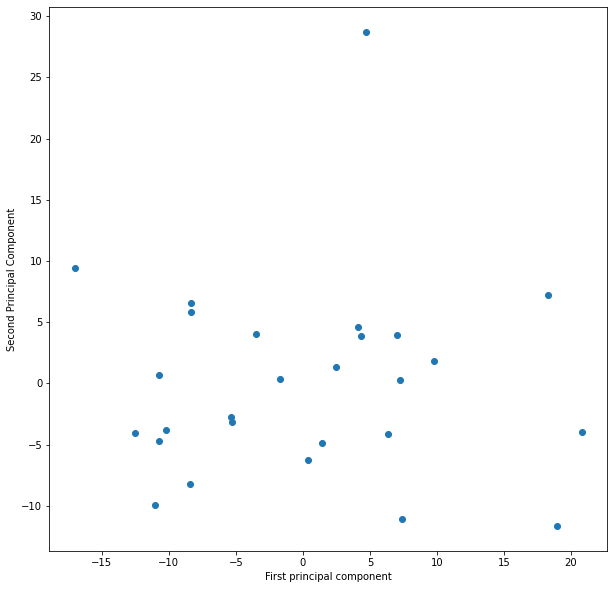

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [8]:
pca.components_

array([[-0.07956869,  0.06710085, -0.07986549,  0.06045735, -0.07998569,
         0.05199327, -0.07991308,  0.04170412, -0.07963883,  0.0300265 ,
        -0.07914443,  0.01773063, -0.07841114,  0.00549097, -0.07742115,
        -0.00616263, -0.07617811, -0.0167409 , -0.07467302, -0.02611337,
        -0.07288986, -0.03429861, -0.07082774, -0.04149044, -0.06846697,
        -0.04783103, -0.06576556, -0.05337328, -0.06277893, -0.05821144,
        -0.05945295, -0.06251618, -0.05580413, -0.06624675, -0.05180341,
        -0.06948251, -0.04740922, -0.07226562, -0.0425873 , -0.07463396,
        -0.03742074, -0.07664302, -0.03206744, -0.07833597, -0.02643963,
        -0.0796279 , -0.02072984, -0.0805479 , -0.01504853, -0.08119346,
        -0.00950572, -0.08173313, -0.00419511, -0.08227687,  0.00079407,
        -0.08276867,  0.00532532, -0.08317112,  0.00944057, -0.08333916,
         0.0130668 , -0.08284643,  0.01619332, -0.0810577 ,  0.01874334,
        -0.0769105 ,  0.02069497, -0.06924705,  0.0

In [11]:
path = f'cut'
filelist =[]
digits =[]
digits_int =[]
for file in glob.glob(f'{path}\\*.c3d',recursive = True):
    filelist.append(file[4:-4].replace("_", ""))
    digits.append(file[4:-7])

for ele in digits:
    digits_int.append(1) if ele=='degeneration' else digits_int.append(0)  

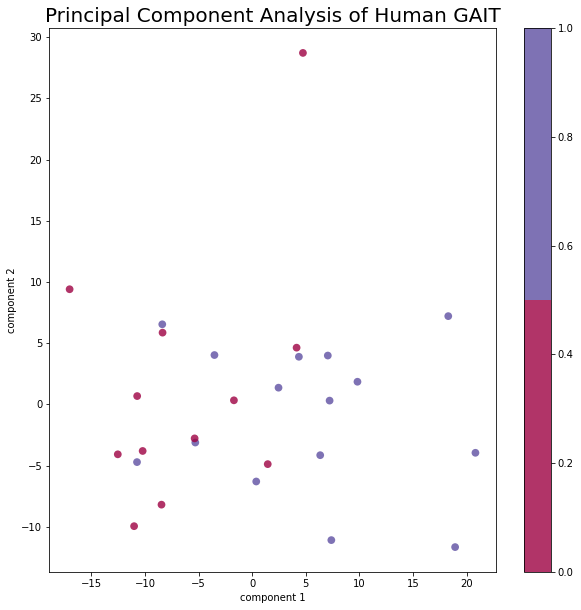

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=digits_int, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap("Spectral", 2), s=60)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Principal Component Analysis of Human GAIT",fontsize=20)
targets = ['degeneration', 'healthy']
plt.colorbar();

<li>Podział na chorych(fioletowy) i zdrowych(czerwony). Klasyfikator rozróżnił dwie oczekiwane klasy. Nie są one idealnie widoczne, lecz po naniesienu kolorów widać skupiska elementów danej klasy.
<li>Problem w dokładniejszych wysunięciu wniosków spowodowany jest przygotowaniem za małej bazy danych, która nie pozwala nam na dokładniejszą analizę.


In [13]:
features = ['jrd', 'jra']
features

['jrd', 'jra']

<AxesSubplot:>

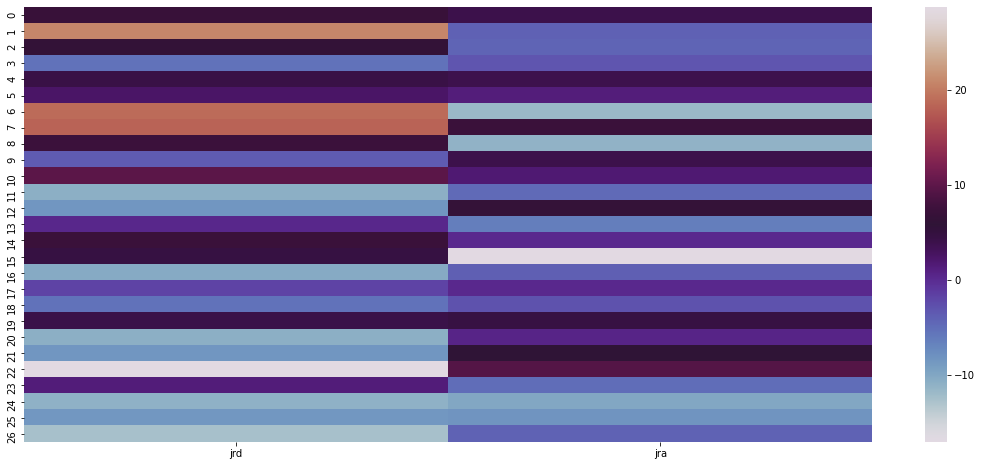

In [14]:
map= pd.DataFrame(x_pca,columns=features)
plt.figure(figsize=(19,8))
sns.heatmap(map,cmap='twilight')

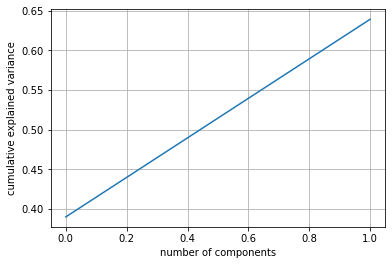

In [15]:
explained_variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

In [16]:
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      (explained_variance)  )

Components =  2 ;
Total explained variance =  [0.39004021 0.2493428 ]
